In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob


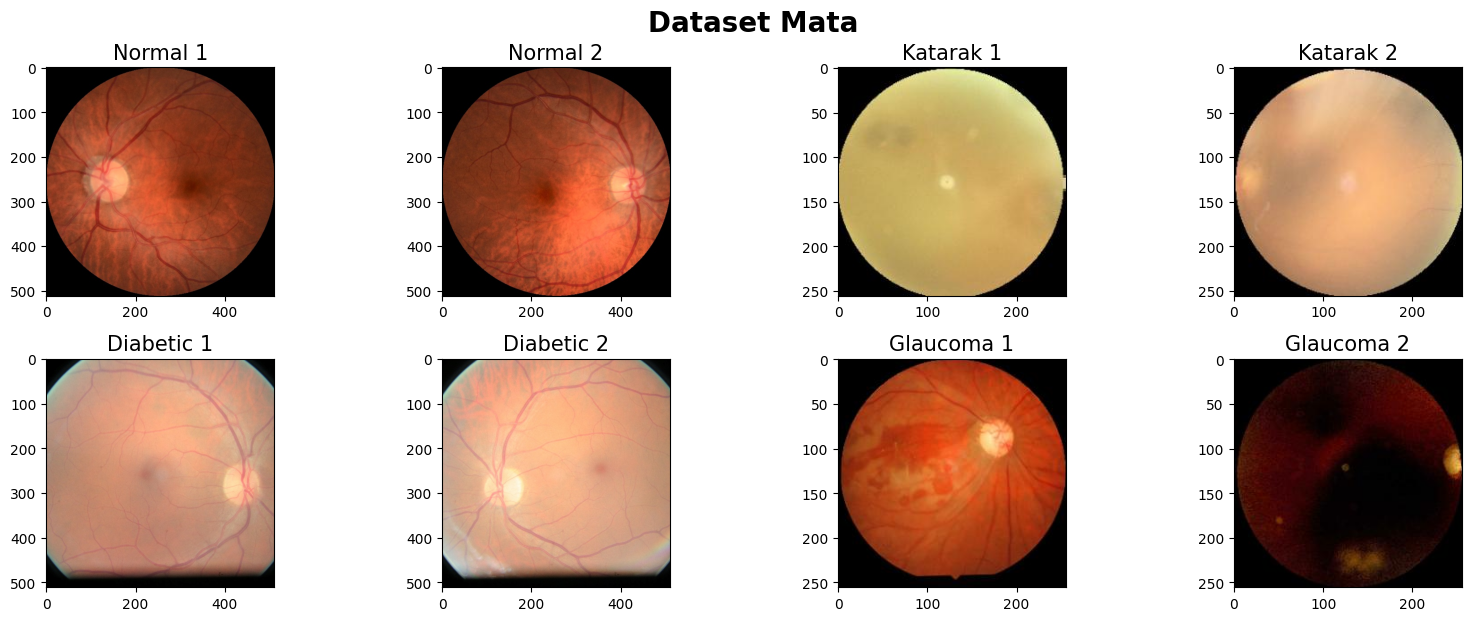

In [20]:
mata_normal1 = plt.imread('dataset/normal/8_left.jpg')
mata_normal2 = plt.imread('dataset/normal/8_right.jpg')

mata_katarak1 = plt.imread('dataset/cataract/_0_4015166.jpg')
mata_katarak2 = plt.imread('dataset/cataract/_1_5346540.jpg')

mata_diabetic1 = plt.imread('dataset/diabetic_retinopathy/100_left.jpeg')
mata_diabetic2 = plt.imread('dataset/diabetic_retinopathy/100_right.jpeg')

mata_glaucoma1 = plt.imread('dataset/glaucoma/_0_4517448.jpg')
mata_glaucoma2 = plt.imread('dataset/glaucoma/_1_4540560.jpg')

plt.figure(figsize=(16, 12))
plt.suptitle('Dataset Mata', fontsize=20, fontweight='bold')

plt.subplot(4,4,1)
plt.title('Normal 1', fontsize=15)
plt.imshow(mata_normal1)

plt.subplot(4,4,2)
plt.title('Normal 2', fontsize=15)
plt.imshow(mata_normal2)

plt.subplot(4,4,3)
plt.title('Katarak 1', fontsize=15)
plt.imshow(mata_katarak1)

plt.subplot(4,4,4)
plt.title('Katarak 2', fontsize=15)
plt.imshow(mata_katarak2)

plt.subplot(4,4,5)
plt.title('Diabetic 1', fontsize=15)
plt.imshow(mata_diabetic1)

plt.subplot(4,4,6)
plt.title('Diabetic 2', fontsize=15)
plt.imshow(mata_diabetic2)

plt.subplot(4,4,7)
plt.title('Glaucoma 1', fontsize=15)
plt.imshow(mata_glaucoma1)

plt.subplot(4,4,8)
plt.title('Glaucoma 2', fontsize=15)
plt.imshow(mata_glaucoma2)

plt.tight_layout()

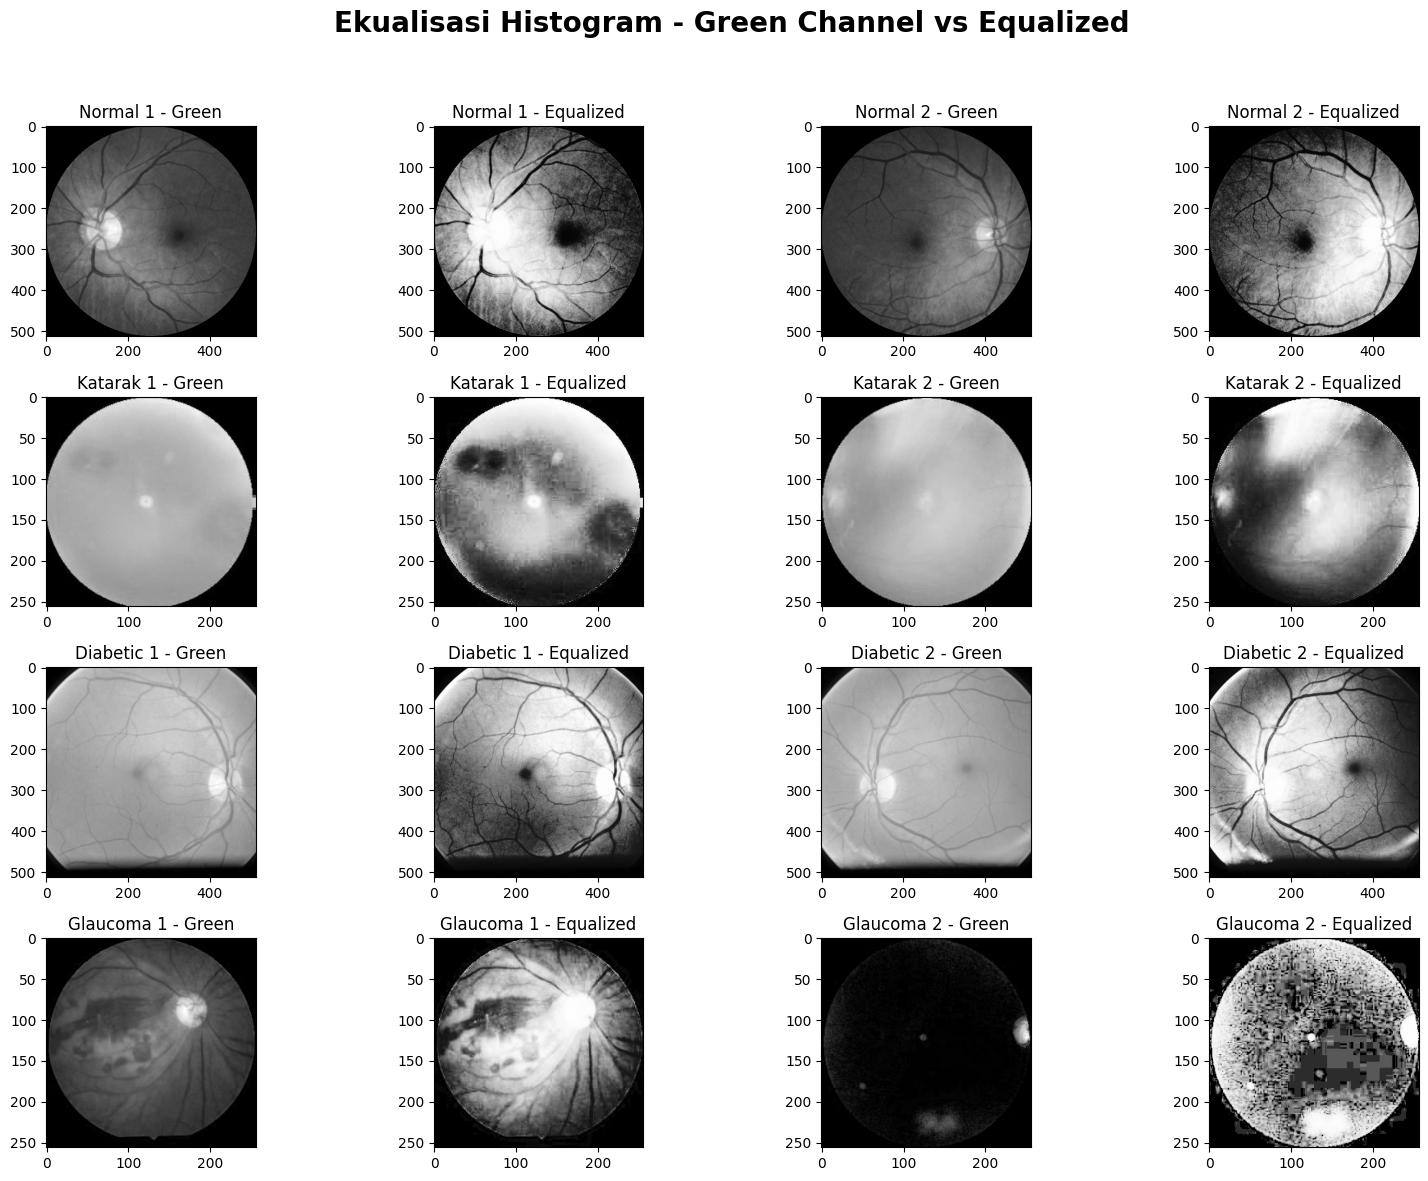

In [21]:
# Fungsi ekualisasi histogram manual (grayscale)
def histogram_equalization(img_gray):
    hist, bins = np.histogram(img_gray.flatten(), bins=256, range=[0,255])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    img_eq = np.interp(img_gray.flatten(), bins[:-1], cdf_normalized)
    return img_eq.reshape(img_gray.shape).astype(np.uint8)

# Fungsi ambil channel hijau & konversi ke uint8
def preprocess_to_gray(img):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    return img[:, :, 1]

# Daftar citra dan label
images = [
    ('Normal 1', mata_normal1),
    ('Normal 2', mata_normal2),
    ('Katarak 1', mata_katarak1),
    ('Katarak 2', mata_katarak2),
    ('Diabetic 1', mata_diabetic1),
    ('Diabetic 2', mata_diabetic2),
    ('Glaucoma 1', mata_glaucoma1),
    ('Glaucoma 2', mata_glaucoma2)
]

# 2 kolom per gambar (green & equalized) → total 4 kolom × 4 baris
plt.figure(figsize=(16, 12))
plt.suptitle('Ekualisasi Histogram - Green Channel vs Equalized', fontsize=20, fontweight='bold')

for i, (label, img) in enumerate(images):
    gray = preprocess_to_gray(img)
    eq = histogram_equalization(gray)

    # posisi subplot: 4 baris, 4 kolom
    plt.subplot(4, 4, 2*i + 1)
    plt.imshow(gray, cmap='gray')
    plt.title(f'{label} - Green', fontsize=12)

    plt.subplot(4, 4, 2*i + 2)
    plt.imshow(eq, cmap='gray')
    plt.title(f'{label} - Equalized', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [22]:
# def preprocess_citra(img):
#     # Jika gambar RGB -> convert ke uint8
#     if img.dtype != np.uint8:
#         img = (img * 255).astype(np.uint8)

#     # Ambil channel hijau saja
#     green_channel = img[:, :, 1]

#     # Terapkan CLAHE
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     enhanced = clahe.apply(green_channel)

#     return enhanced

# # Terapkan preprocessing
# proc_normal1 = preprocess_citra(mata_normal1)
# proc_normal2 = preprocess_citra(mata_normal2)
# proc_katarak1 = preprocess_citra(mata_katarak1)
# proc_katarak2 = preprocess_citra(mata_katarak2)
# proc_diabetic1 = preprocess_citra(mata_diabetic1)
# proc_diabetic2 = preprocess_citra(mata_diabetic2)
# proc_glaucoma1 = preprocess_citra(mata_glaucoma1)
# proc_glaucoma2 = preprocess_citra(mata_glaucoma2)

# # Visualisasi hasil preprocessing
# plt.figure(figsize=(12, 8))
# plt.suptitle('Citra Setelah Preprocessing (Green Channel + CLAHE)', fontsize=18, fontweight='bold')

# plt.subplot(4,4,1); plt.imshow(proc_normal1, cmap='gray'); plt.title('Normal 1')
# plt.subplot(4,4,2); plt.imshow(proc_normal2, cmap='gray'); plt.title('Normal 2')
# plt.subplot(4,4,3); plt.imshow(proc_katarak1, cmap='gray'); plt.title('Katarak 1')
# plt.subplot(4,4,4); plt.imshow(proc_katarak2, cmap='gray'); plt.title('Katarak 2')
# plt.subplot(4,4,5); plt.imshow(proc_diabetic1, cmap='gray'); plt.title('Diabetic 1')
# plt.subplot(4,4,6); plt.imshow(proc_diabetic2, cmap='gray'); plt.title('Diabetic 2')
# plt.subplot(4,4,7); plt.imshow(proc_glaucoma1, cmap='gray'); plt.title('Glaucoma 1')
# plt.subplot(4,4,8); plt.imshow(proc_glaucoma2, cmap='gray'); plt.title('Glaucoma 2')

# plt.tight_layout()
# plt.show()

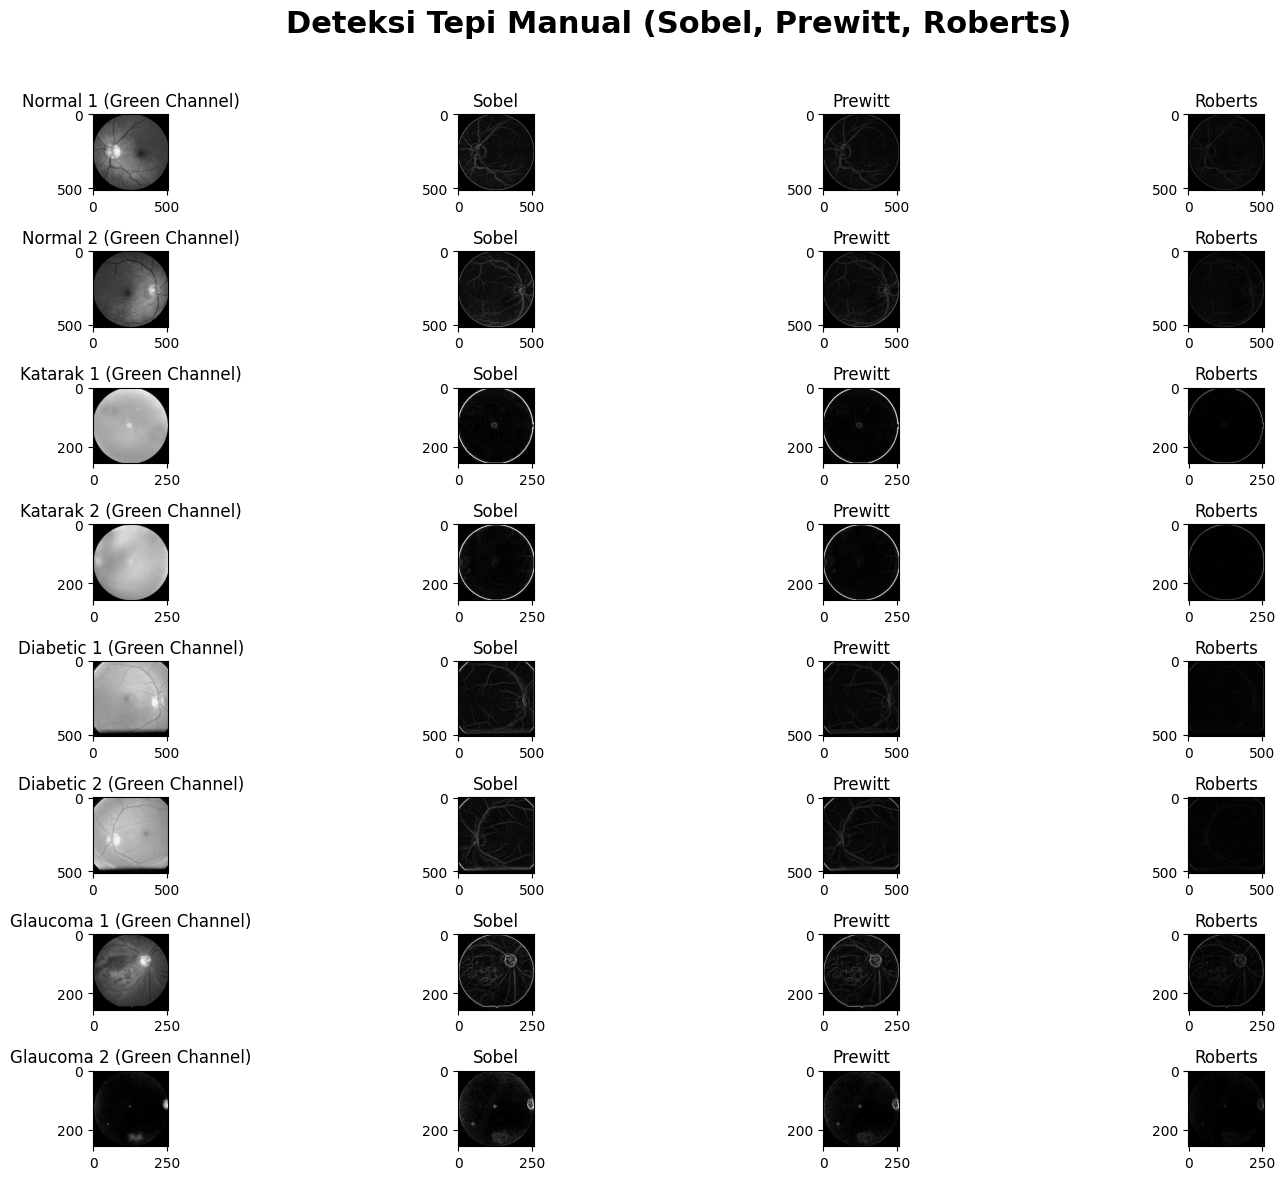

In [23]:
# Fungsi deteksi tepi manual
def sobel_edge_detection(img):
    img = img.astype(np.int32)
    kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    padded = np.pad(img, ((1,1),(1,1)), mode='constant', constant_values=0)
    edges = np.zeros_like(img)
    for i in range(1, padded.shape[0]-1):
        for j in range(1, padded.shape[1]-1):
            region = padded[i-1:i+2, j-1:j+2]
            gx = np.sum(region * kernel_x)
            gy = np.sum(region * kernel_y)
            grad = np.sqrt(gx**2 + gy**2)
            edges[i-1, j-1] = np.clip(grad, 0, 255)
    return edges.astype(np.uint8)

def prewitt_edge_detection(img):
    img = img.astype(np.int32)
    kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    kernel_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    padded = np.pad(img, ((1,1),(1,1)), mode='constant', constant_values=0)
    edges = np.zeros_like(img)
    for i in range(1, padded.shape[0]-1):
        for j in range(1, padded.shape[1]-1):
            region = padded[i-1:i+2, j-1:j+2]
            gx = np.sum(region * kernel_x)
            gy = np.sum(region * kernel_y)
            grad = np.sqrt(gx**2 + gy**2)
            edges[i-1, j-1] = np.clip(grad, 0, 255)
    return edges.astype(np.uint8)

def roberts_edge_detection(img):
    img = img.astype(np.int32)
    kernel_x = np.array([[1, 0],[0, -1]])
    kernel_y = np.array([[0, 1],[-1, 0]])
    padded = np.pad(img, ((0,1),(0,1)), mode='constant', constant_values=0)
    edges = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+2, j:j+2]
            gx = np.sum(region * kernel_x)
            gy = np.sum(region * kernel_y)
            grad = np.sqrt(gx**2 + gy**2)
            edges[i, j] = np.clip(grad, 0, 255)
    return edges.astype(np.uint8)


# List citra dan label
images = [
    ('Normal 1', mata_normal1),
    ('Normal 2', mata_normal2),
    ('Katarak 1', mata_katarak1),
    ('Katarak 2', mata_katarak2),
    ('Diabetic 1', mata_diabetic1),
    ('Diabetic 2', mata_diabetic2),
    ('Glaucoma 1', mata_glaucoma1),
    ('Glaucoma 2', mata_glaucoma2)
]

plt.figure(figsize=(16, 12))
plt.suptitle('Deteksi Tepi Manual (Sobel, Prewitt, Roberts)', fontsize=22, fontweight='bold')

for idx, (label, img) in enumerate(images):
    green = img[:, :, 1]  # ambil channel hijau
    
    sobel = sobel_edge_detection(green)
    prewitt = prewitt_edge_detection(green)
    roberts = roberts_edge_detection(green)
    
    # Tampilkan Sobel
    plt.subplot(len(images), 4, idx*4 + 1)
    plt.imshow(green, cmap='gray')
    plt.title(f'{label} (Green Channel)')
    
    # Tampilkan Sobel
    plt.subplot(len(images), 4, idx*4 + 2)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel')
    
    # Tampilkan Prewitt
    plt.subplot(len(images), 4, idx*4 + 3)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt')
    
    # Tampilkan Roberts
    plt.subplot(len(images), 4, idx*4 + 4)
    plt.imshow(roberts, cmap='gray')
    plt.title('Roberts')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
